<a href="https://colab.research.google.com/github/oliva2/EDA/blob/main/ChangeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rasterio numpy pillow gdown


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 25.0 MB/s eta 0:00:00


In [ ]:
import gdown

# Google Drive File ID (you extracted from your URL)
file_id = "1yIb97ZeC-nDc9P9r1FZ_30cqrIshWomB"
output_path = "drone_image_2023.tif"

# Download using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1yIb97ZeC-nDc9P9r1FZ_30cqrIshWomB
From (redirected): https://drive.google.com/uc?id=1yIb97ZeC-nDc9P9r1FZ_30cqrIshWomB&confirm=t&uuid=aedce61f-80cc-4639-8cb2-acee72314495
To: /content/drone_image_2023.tif
100%|██████████| 582M/582M [00:09<00:00, 63.9MB/s]


'drone_image_2023.tif'

In [ ]:
import rasterio
from rasterio.windows import Window
import numpy as np
from PIL import Image
import os

def tile_geotiff(image_path, tile_size=256, output_dir="tiles"):
    os.makedirs(output_dir, exist_ok=True)

    with rasterio.open(image_path) as src:
        width, height = src.width, src.height
        print(f"Image size: {width}x{height}, Bands: {src.count}")
        tile_count = 0

        for top in range(0, height, tile_size):
            for left in range(0, width, tile_size):
                window = Window(left, top, tile_size, tile_size)
                transform = src.window_transform(window)
                data = src.read(window=window)

                # Convert (bands, H, W) → (H, W, bands)
                if data.shape[0] >= 3:
                    rgb = np.stack([data[0], data[1], data[2]], axis=-1)
                else:
                    rgb = np.stack([data[0]]*3, axis=-1)

                # Normalize to 0–255 and convert to uint8
                rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)

                # Save as PNG
                tile_image = Image.fromarray(rgb)
                filename = f"tile_{top}_{left}.png"
                tile_image.save(os.path.join(output_dir, filename))
                tile_count += 1

        print(f"✅ Tiling complete. {tile_count} tiles saved in '{output_dir}'.")

# Run the function
tile_geotiff("drone_image_2023.tif", tile_size=256)


Image size: 14848x17408, Bands: 3


<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in divide
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in cast
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in divide
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in cast
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in divide
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in cast
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered

✅ Tiling complete. 3944 tiles saved in 'tiles'.


<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in divide
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
<ipython-input-3-2e7a89e70d12>:28: RuntimeWarning: invalid value encountered in cast
  rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)


In [ ]:
!pip install transformers
!pip install torch torchvision
!pip install matplotlib
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load model and processor
model = SegformerForSemanticSegmentation.from_pretrained("wu-pr-gw/segformer-b2-finetuned-with-LoveDA")
processor = SegformerImageProcessor.from_pretrained("wu-pr-gw/segformer-b2-finetuned-with-LoveDA")
model.eval()
# Load your image
image_path = "/content/tiles/tile_0_6656.png"
image = Image.open(image_path).convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
upsampled_logits = torch.nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False
)
predicted = upsampled_logits.argmax(1)[0].cpu().numpy()

# Define the mapping from class index to RGB color
color_mapping = {
    1: [255, 0, 0],     # Built-up → Red
    5: [0, 255, 0],     # Vegetation → Green
    3: [0, 0, 255],     # Water → Blue
}

# Create a color mask
color_mask = np.zeros((predicted.shape[0], predicted.shape[1], 3), dtype=np.uint8)

# Apply the color mapping
for class_idx, color in color_mapping.items():
    color_mask[predicted == class_idx] = color



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/110M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

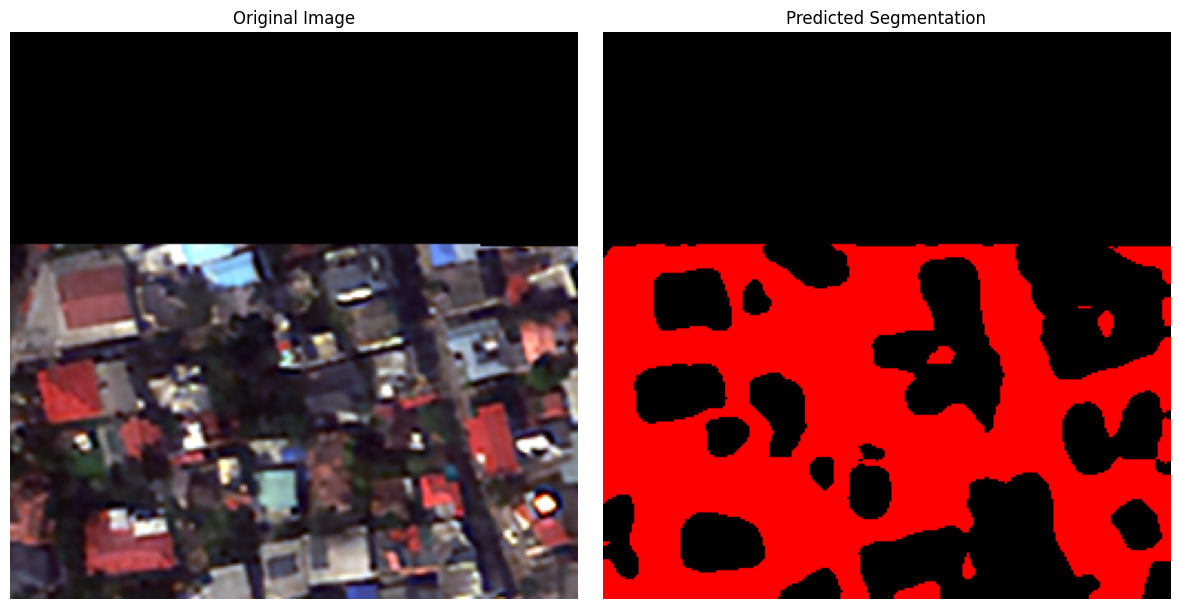

In [ ]:
plt.figure(figsize=(12, 6))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(color_mask)
plt.title("Predicted Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
unique, counts = np.unique(predicted, return_counts=True)
total = counts.sum()
for u, c in zip(unique, counts):
    print(f"Class {u}: {c / total:.2%}")


Class 0: 37.68%
Class 1: 37.38%
Class 2: 24.94%


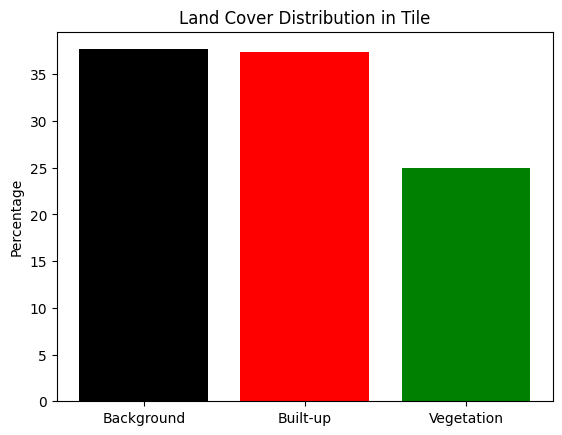

In [ ]:
import matplotlib.pyplot as plt

labels = ['Background', 'Built-up', 'Vegetation']
values = [37.68, 37.38, 24.94]

plt.bar(labels, values, color=['black', 'red', 'green'])
plt.title('Land Cover Distribution in Tile')
plt.ylabel('Percentage')
plt.show()


Enter image file name (e.g., tile_0_6656.png): tile_0_12800.png


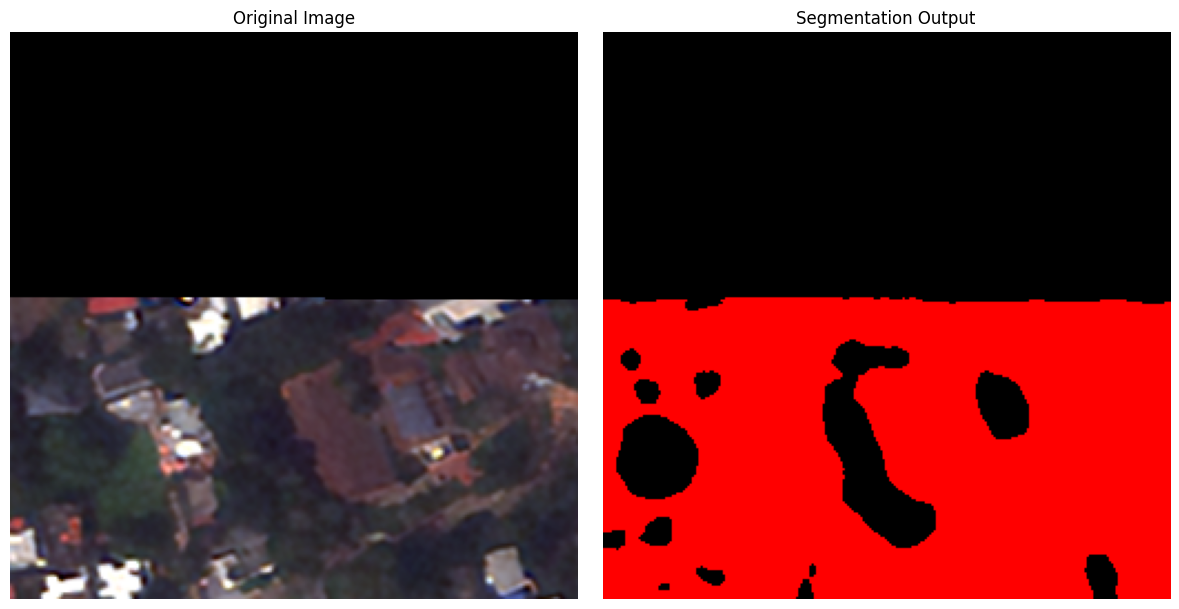

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor

# Load model and processor (only once)
model = SegformerForSemanticSegmentation.from_pretrained("wu-pr-gw/segformer-b2-finetuned-with-LoveDA")
processor = SegformerImageProcessor.from_pretrained("wu-pr-gw/segformer-b2-finetuned-with-LoveDA")
model.eval()

# Color mapping (you can customize)
color_mapping = {
    0: [0, 0, 0],       # Background (BG)
    1: [255, 0, 0],     # Built-up (BU)
    5: [0, 255, 0],     # Vegetation (VEG)
    3: [0, 0, 255],     # Water (WAT)
}

# ========== USER INPUT ==========
image_name = input("Enter image file name (e.g., tile_0_6656.png): ").strip()
image_path = f"tiles/{image_name}"


if not os.path.exists(image_path):
    print("❌ File not found.")
else:
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits

    # Resize output to image size
    upsampled_logits = torch.nn.functional.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False
    )
    predicted = upsampled_logits.argmax(1)[0].cpu().numpy()

    # Generate RGB color mask
    color_mask = np.zeros((predicted.shape[0], predicted.shape[1], 3), dtype=np.uint8)
    for class_idx, color in color_mapping.items():
        color_mask[predicted == class_idx] = color

    # Show original and mask
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(color_mask)
    plt.title("Segmentation Output")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
